# Riskfolio-Lib Tutorial: 
<a href="https://www.kqzyfj.com/click-101360347-15150084?url=https%3A%2F%2Flink.springer.com%2Fbook%2F9783031843037" target="_blank">
<div>
<img src="https://raw.githubusercontent.com/dcajasn/Riskfolio-Lib/refs/heads/master/docs/source/_static/Button.png" height="40" />
</div>
<br>
</a>
<a href="https://www.paypal.com/ncp/payment/GN55W4UQ7VAMN" target="_blank">
<div>
<img src="https://raw.githubusercontent.com/dcajasn/Riskfolio-Lib/refs/heads/master/docs/source/_static/Button2.png" height="40" />
</div>
</a>

__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__

__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__

## Classic Mean Risk Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2020-01-01'
end = '2025-12-30'

# Tickers of assets
asset_classes = pd.read_excel('asset_classes.xlsx')
asset_classes = asset_classes.sort_values(by=['Assets'])

assets = asset_classes['Assets'].tolist()
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end, auto_adjust=False)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  270 of 270 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,A,AAPL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WFC,WM,WMB,WMT,WY,WYNN,XEL,XOM,YUM,ZBH
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,-1.6056%,-0.9722%,-1.2191%,-0.7834%,-1.7604%,-0.1952%,-0.2113%,-1.5333%,0.0395%,-0.1070%,...,-0.6140%,0.9718%,0.4257%,-0.8828%,0.1701%,-1.4833%,0.4809%,-0.8040%,-0.3132%,-0.2614%
2020-01-06,0.2956%,0.7968%,0.5240%,0.5726%,-1.1749%,-0.7822%,0.1353%,1.1733%,0.0920%,0.3321%,...,-0.5990%,0.5202%,1.3141%,-0.2036%,-0.2038%,-0.1979%,-0.1436%,0.7678%,-0.0589%,-0.5779%
2020-01-07,0.3065%,-0.4703%,-0.5560%,-0.0959%,2.2751%,-1.2046%,-1.2104%,0.2031%,0.3677%,0.0214%,...,-0.8286%,0.0690%,0.0000%,-0.9265%,-0.6467%,0.4745%,-0.2077%,-0.8184%,0.1769%,-0.0879%
2020-01-08,0.9873%,1.6087%,0.4076%,1.3438%,0.9032%,-1.1084%,0.9397%,1.3067%,-0.1701%,-0.2989%,...,0.3038%,0.0603%,-1.5481%,-0.3432%,0.3768%,0.6274%,-0.0960%,-1.5080%,0.1765%,1.1974%
2020-01-09,1.5712%,2.1240%,0.2668%,0.7636%,0.0000%,-1.0311%,0.8839%,1.0476%,0.3801%,0.5032%,...,-0.1704%,0.0431%,0.5950%,1.0331%,0.8191%,-0.4203%,0.2243%,0.7655%,0.7929%,-0.6618%


## 2. Estimating Mean Risk Portfolios

In [3]:
%%time

import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculate optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)
port.solvers = ['MOSEK']
#port.card = 20
# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(
    model=model,
    rm=rm,
    obj=obj,
    rf=rf,
    l=l,
    hist=hist)

display(w.T)
print('Number of Assets', np.where(w>=0.0001, 1,0).sum())

,A,AAPL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WFC,WM,WMB,WMT,WY,WYNN,XEL,XOM,YUM,ZBH
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0001%,...,0.0000%,0.0003%,0.0001%,7.6820%,0.0000%,0.0000%,0.0000%,0.0001%,1.6277%,0.0001%


Number of Assets 31
CPU times: user 2.29 s, sys: 1.41 s, total: 3.7 s
Wall time: 2.91 s


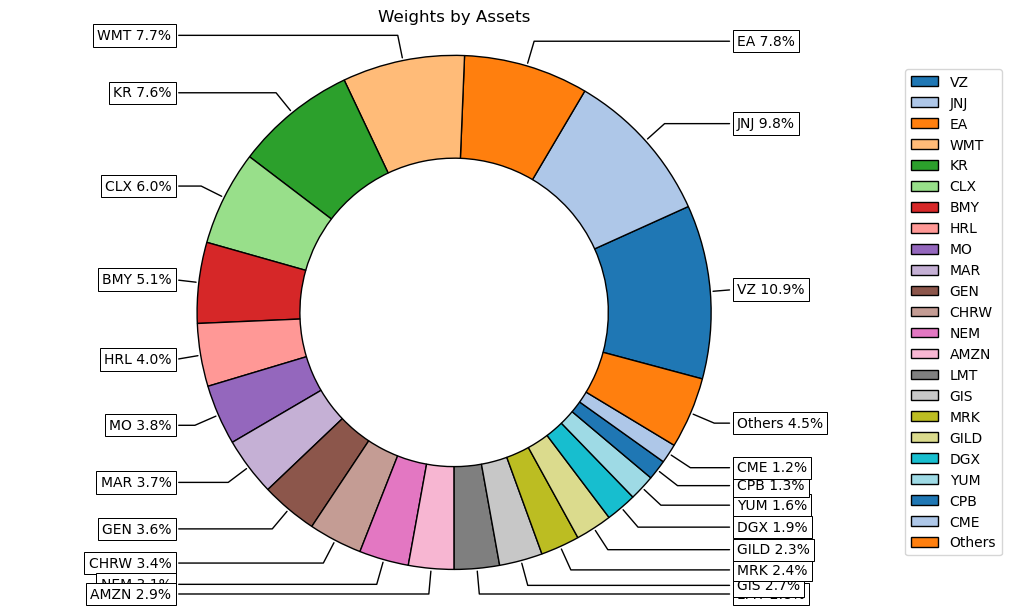

In [4]:
# Plot the composition of the portfolio by Assets

ax = rp.plot_pie(
    w=w,
    title='Weights by Assets',
    others=0.05,
    nrow=25,
    cmap="tab20",
    height=6,
    width=10,
    ax=None)

In [5]:
# Composition of the portfolio by Sector

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Sector']).sum()['weights']
display(w_classes)

Sector
Communication Services   18.7651%
Consumer Discretionary    8.6814%
Consumer Staples         34.7326%
Energy                    0.0014%
Financials                1.4664%
Health Care              22.0868%
Industrials               6.9825%
Information Technology    3.5627%
Materials                 3.7200%
Real Estate               0.0003%
Utilities                 0.0007%
Name: weights, dtype: float64

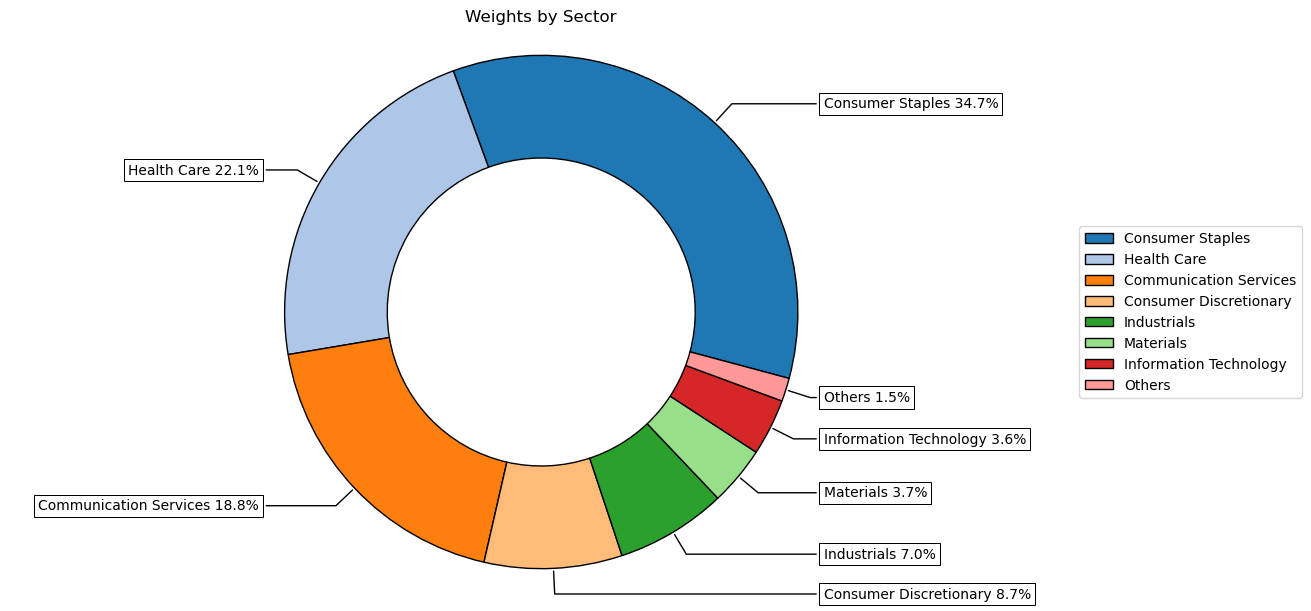

In [6]:
# Plot the composition of the portfolio by Sector

ax = rp.plot_pie(
    w=w_classes,
    title='Weights by Sector',
    others=0.05,
    nrow=25,
    cmap="tab20",
    height=6,
    width=13,
    ax=None)

In [7]:
# Calculate points in Efficient Frontier

points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(
    model=model,
    rm=rm,
    points=points,
    rf=rf,
    hist=hist)

display(frontier.T.head())

,A,AAPL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WFC,WM,WMB,WMT,WY,WYNN,XEL,XOM,YUM,ZBH
0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0001%,...,0.0000%,0.0003%,0.0001%,7.6820%,0.0000%,0.0000%,0.0000%,0.0001%,1.6277%,0.0001%
1,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.1473%,10.4732%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.1362%,11.1274%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
3,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0295%,11.1888%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
4,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0002%,10.5808%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


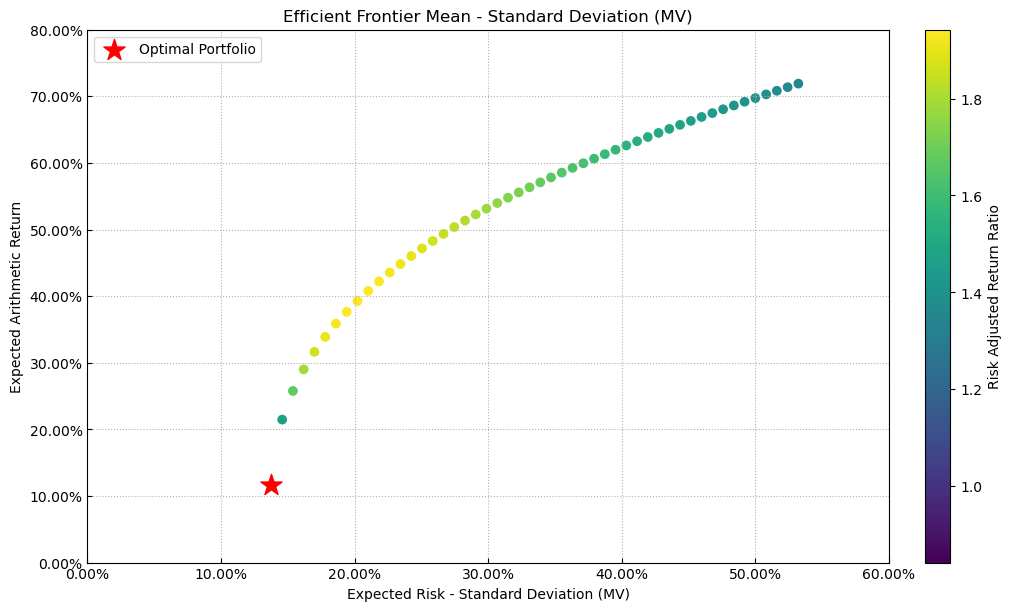

In [8]:
# Plot the Efficient Frontier

label = 'Optimal Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(
    w_frontier=frontier,
    mu=mu,
    cov=cov,
    returns=returns,
    rm=rm,
    rf=rf,
    alpha=0.05,
    cmap='viridis',
    w=w,
    label=label,
    marker='*',
    s=16,
    c='r',
    height=6,
    width=10,
    ax=None)

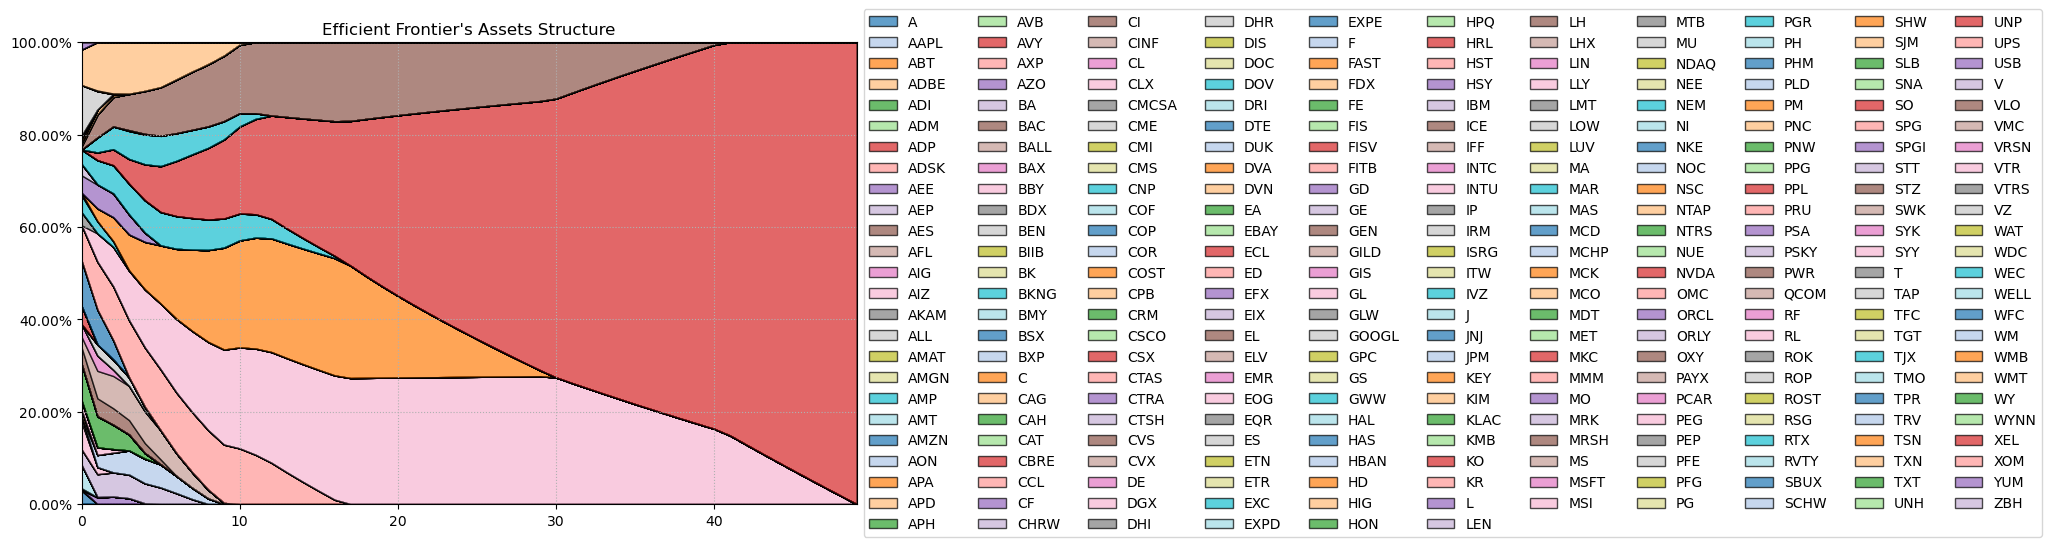

In [9]:
# Plot Efficient Frontier composition

ax = rp.plot_frontier_area(
    w_frontier=frontier,
    cmap="tab20",
    height=6,
    width=10,
    ax=None)

## 3. Constraints on Assets and Sectors

In [10]:
# Constraints in Riskfolio-Lib format

constraints = {'Disabled': [False, False, False, False, False, False],
               'Type': ['All Assets', 'Classes', 'Classes', 'Classes',
                        'Classes', 'All Classes'],
               'Set': ['', 'Sector', 'Sector', 'Sector', 'Sector', 'Sector'],
               'Position': ['', 'Consumer Staples', 'Health Care', 'Utilities',
                            'Real Estate', ''],
               'Sign': ['<=', '<=', '<=', '>=', '>=', '<='],
               'Weight': [0.10, 0.15, 0.15, 0.05, 0.05, 0.18],
               'Type Relative': ['', '', '', '', '', ''],
               'Relative Set': ['', '', '', '', '', ''],
               'Relative': ['', '', '', '', '', ''],
               'Factor': ['', '', '', '', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,10.0000%,,,,
1,False,Classes,Sector,Consumer Staples,<=,15.0000%,,,,
2,False,Classes,Sector,Health Care,<=,15.0000%,,,,
3,False,Classes,Sector,Utilities,>=,5.0000%,,,,
4,False,Classes,Sector,Real Estate,>=,5.0000%,,,,
5,False,All Classes,Sector,,<=,18.0000%,,,,


In [11]:
# Matrices of linear constraints

A, B = rp.assets_constraints(constraints, asset_classes)

In [12]:
%%time
# Calculate optimal portfolio with linear constraints

port.ainequality = A
port.binequality = B
#port.card = 15

model = 'Classic'
rm = 'MV'
obj = 'MinRisk'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)
print('Number of Assets', np.where(w>=0.0001, 1,0).sum())

,A,AAPL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WFC,WM,WMB,WMT,WY,WYNN,XEL,XOM,YUM,ZBH
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,3.0873%,0.0000%,1.9330%,0.0000%,0.0000%,0.0000%,0.3440%,1.5358%,0.0000%


Number of Assets 32
CPU times: user 105 ms, sys: 21.4 ms, total: 126 ms
Wall time: 100 ms


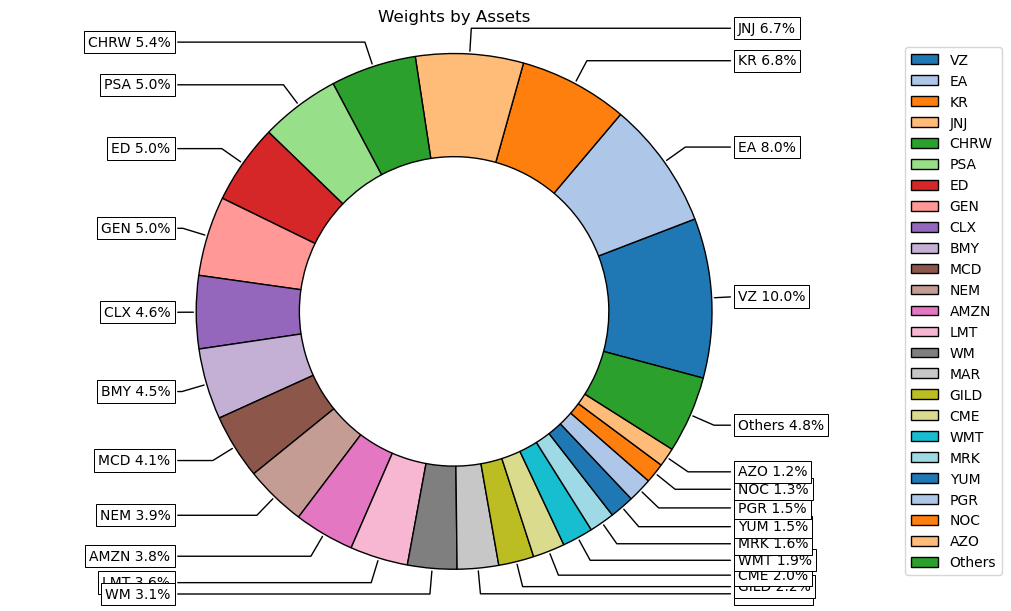

In [13]:
# Plot the composition of the portfolio by Assets

ax = rp.plot_pie(
    w=w,
    title='Weights by Assets',
    others=0.05,
    nrow=25,
    cmap="tab20",
    height=6,
    width=10,
    ax=None)

In [14]:
# Composition of the portfolio by Sector

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Sector']).sum()['weights']
display(w_classes)

Sector
Communication Services   18.0000%
Consumer Discretionary   13.1354%
Consumer Staples         15.0000%
Energy                    0.9271%
Financials                4.4020%
Health Care              15.0000%
Industrials              13.8370%
Information Technology    5.4909%
Materials                 4.2077%
Real Estate               5.0000%
Utilities                 5.0000%
Name: weights, dtype: float64

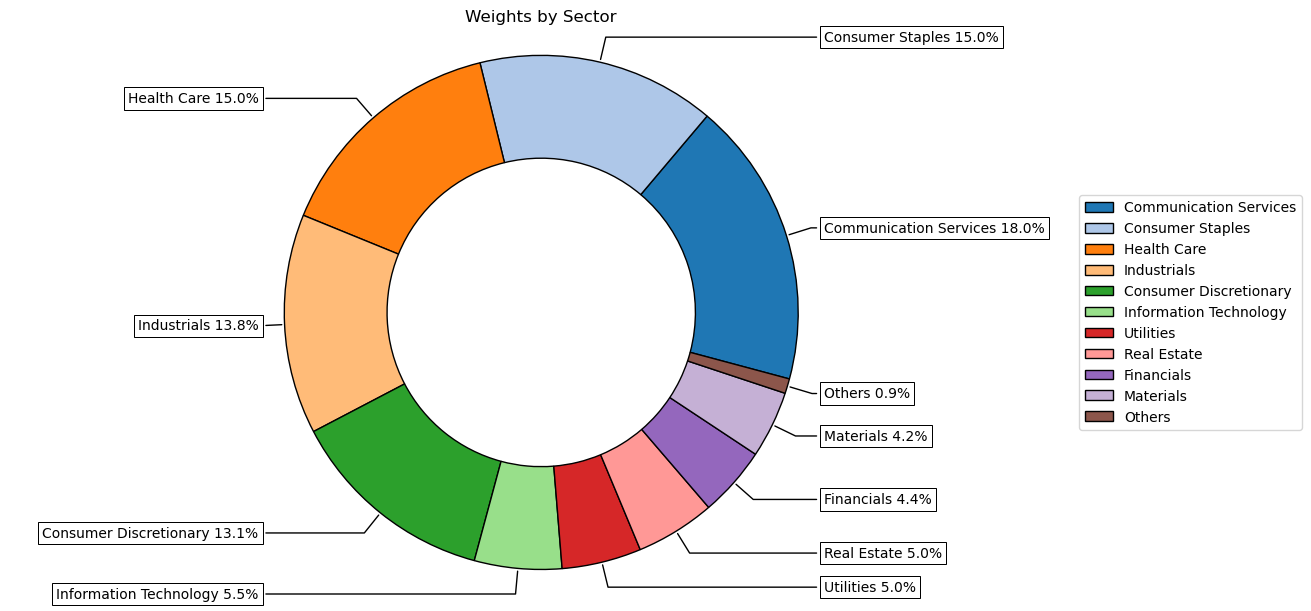

In [15]:
# Plot the composition of the portfolio by Sector

ax = rp.plot_pie(
    w=w_classes,
    title='Weights by Sector',
    others=0.05,
    nrow=25,
    cmap="tab20",
    height=6,
    width=13,
    ax=None)